
# Homework-2: Linear Regression and Multiple Linear Regression

## Due: 2/7/2025 at 11:50 PM

## Instructions:
1. **Do not remove any existing cells.** Each section contains questions related to linear regression models.
2. **Write a clear Python code under each question.** If a question requires an explanation, write it in a markdown cell.
3. **Use the datasets provided.** Ensure that all analyses are performed using the given datasets.
4. **Submit your completed notebook to the Blackboard.**

---

## Part I: Simple Linear Regression

**Dataset Preview:**

```python
import pandas as pd

dataset = pd.read_csv("Salary_Data.csv") 
dataset.head()
```

| YearsExperience | Salary  |
|----------------|---------|
| 1.1           | 39343.0 |
| 1.3           | 46205.0 |
| 1.5           | 37731.0 |
| 2.0           | 43525.0 |
| 2.2           | 39891.0 |

### Q1: Explore the dataset and split it into training and testing sets
- Choose "YearsExperience" as the independent variable **X**.
- Choose "Salary" as the dependent variable **Y**.

```python
# Write your code here
```


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [11]:
import os
cwd = os.getcwd()
print(cwd)

/Users/annubaka/Library/CloudStorage/OneDrive-JacksonvilleUniversity/Vocational/School Year 2024-25/Spring/MATH470


In [13]:
salary_dataset = pd.read_csv("homework/hw-2/Salary_Data.csv")
salary_dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [14]:
X = salary_dataset[["YearsExperience"]]
y = salary_dataset["Salary"]

Text(0, 0.5, 'Salary')

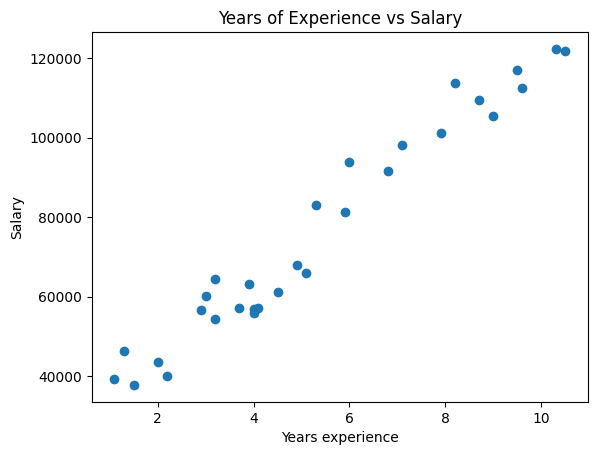

In [15]:
plt.scatter(X, y)
plt.title("Years of Experience vs Salary")
plt.xlabel("Years experience")
plt.ylabel("Salary")

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head(), y_train.head()

(    YearsExperience
 28             10.3
 24              8.7
 12              4.0
 0               1.1
 4               2.2,
 28    122391.0
 24    109431.0
 12     56957.0
 0      39343.0
 4      39891.0
 Name: Salary, dtype: float64)

### Q2: Fit Simple Linear Regression to the Training set

```python
# Write your code here
```

In [17]:
lin_reg = LinearRegression().fit(X_train, y_train)
lin_reg

LinearRegression()


### Q3: Predict the Test set results

```python
# Write your code here
```


In [18]:
y_pred = lin_reg.predict(X_test)
y_pred

array([115790.21011287,  71498.27809463, 102596.86866063,  75267.80422384,
        55477.79204548,  60189.69970699])


### Q4: Visualizing the Training set results

```python
# Write your code here
```


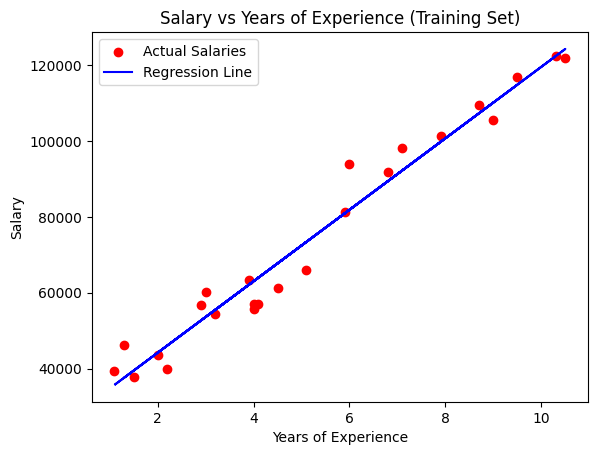

In [19]:
plt.scatter(X_train, y_train, color='red', label='Actual Salaries')
plt.plot(X_train, lin_reg.predict(X_train), color='blue', label='Regression Line')
plt.title('Salary vs Years of Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

### Q5: Visualizing the Test set results

```python
# Write your code here
```


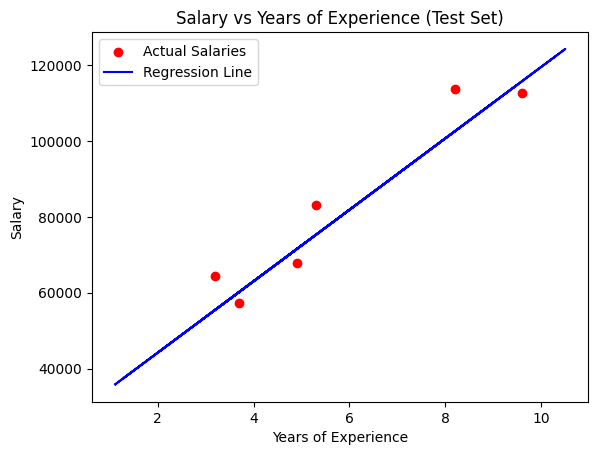

In [20]:
# Visualize the Test set results
plt.scatter(X_test, y_test, color='red', label='Actual Salaries')
plt.plot(X_train, lin_reg.predict(X_train), color='blue', label='Regression Line')
plt.title('Salary vs Years of Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()



### Q6: Check the accuracy of the model

```python
# Write your code here
```



In [21]:
accuracy = lin_reg.score(X_test,y_test)
print('Accuracy of the model is', accuracy * 100,'%')

Accuracy of the model is 90.24461774180497 %


---

## Part II: Multiple Linear Regression

**Dataset Preview:**

```python
dataset = pd.read_csv("50_Startups.csv") 
dataset.head()
```

| R&D Spend  | Administration | Marketing Spend | State     | Profit   |
|------------|---------------|----------------|-----------|----------|
| 165349.20  | 136897.80     | 471784.10     | New York  | 192261.83 |
| 162597.70  | 151377.59     | 443898.53     | California| 191792.06 |
| 153441.51  | 101145.55     | 407934.54     | Florida   | 191050.39 |
| 144372.41  | 118671.85     | 383199.62     | New York  | 182901.99 |
| 142107.34  | 91391.77      | 366168.42     | Florida   | 166187.94 |

### Q1: Explore the dataset and split it into training and testing sets
- Choose "Profit" as the dependent variable **Y**.

In [23]:
# Write your code here
startup = pd.read_csv("homework/hw-2/50_Startups.csv")
startup.head(), startup.describe()

(   R&D Spend  Administration  Marketing Spend       State     Profit
 0  165349.20       136897.80        471784.10    New York  192261.83
 1  162597.70       151377.59        443898.53  California  191792.06
 2  153441.51       101145.55        407934.54     Florida  191050.39
 3  144372.41       118671.85        383199.62    New York  182901.99
 4  142107.34        91391.77        366168.42     Florida  166187.94,
            R&D Spend  Administration  Marketing Spend         Profit
 count      50.000000       50.000000        50.000000      50.000000
 mean    73721.615600   121344.639600    211025.097800  112012.639200
 std     45902.256482    28017.802755    122290.310726   40306.180338
 min         0.000000    51283.140000         0.000000   14681.400000
 25%     39936.370000   103730.875000    129300.132500   90138.902500
 50%     73051.080000   122699.795000    212716.240000  107978.190000
 75%    101602.800000   144842.180000    299469.085000  139765.977500
 max    165349.2000

### Q2: Create dummy variables for the "State" column and avoid the dummy variable trap

In [24]:
# Write your code here
startup = pd.get_dummies(startup, columns=["State"], drop_first=True)
startup

# we know a state is cali if both fl and ny are false

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,True
1,162597.70,151377.59,443898.53,191792.06,False,False
2,153441.51,101145.55,407934.54,191050.39,True,False
3,144372.41,118671.85,383199.62,182901.99,False,True
4,142107.34,91391.77,366168.42,166187.94,True,False
5,131876.90,99814.71,362861.36,156991.12,False,True
6,134615.46,147198.87,127716.82,156122.51,False,False
7,130298.13,145530.06,323876.68,155752.60,True,False
8,120542.52,148718.95,311613.29,152211.77,False,True
9,123334.88,108679.17,304981.62,149759.96,False,False


### Q3: Split data into Training and Testing sets

In [25]:
# Write your code here
X_su = startup.drop(columns=["Profit"])
y_su = startup["Profit"]


In [26]:
X_su_train, X_su_test, y_su_train, y_su_test = train_test_split(X_su, y_su, test_size=0.2, random_state=42)

### Q4: Fit Multiple Linear Regression to the Training set

```python
# Write your code here
```


In [27]:
# Write your code here
m_lin_reg = LinearRegression().fit(X_su_train, y_su_train)
m_lin_reg

LinearRegression()

### Q5: Predict values from the Test set

```python
# Write your code here
```


In [30]:
# Write your code here
y_su_pred = m_lin_reg.predict(X_su_test)
y_su_pred

array([126362.87908255,  84608.45383634,  99677.49425147,  46357.46068582,
       128750.48288504,  50912.4174188 , 109741.35032702, 100643.24281647,
        97599.27574594, 113097.42524432])

### Q6: Check the accuracy of the model

```python
# Write your code here
```

---




In [31]:
# Write your code here
accuracy_su = m_lin_reg.score(X_su_test,y_su_test)
print('Accuracy of the model is', accuracy_su * 100,'%')

Accuracy of the model is 89.87266414328636 %


<br><br><br><br><br><br><br>

---

### **The end of the homework!!**

Please save your work above and  submit the completed notebook to Blackboard (**Make sure you add your name to the file title above**)